agar dataset dapat diakses, menyambungkan colab dengan drive

In [27]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Direktori file yang akan digunakan

In [41]:
base_dir='/content/drive/My Drive/Bangkit_File/ML/Dataset/Versi3'
!ls '/content/drive/My Drive/Bangkit_File/ML/Dataset/Versi3'

augmentasi.ipynb	    FMD_Cattle_Augmented_VALIDATION  Training
FMD_Cattle_Augmented_TRAIN  FMD_Cattle_Ori		     Validation


In [30]:
FMD_dataset_dir= os.path.join(base_dir, 'FMD_Cattle_Ori')
training_dir= os.path.join(base_dir, 'Training')
validation_dir= os.path.join(base_dir, 'Validation')

In [31]:
#isi direktori seluruh dataset (FMD_Cattle_Ori)
sehat_dir= os.path.join(FMD_dataset_dir, '0/')
terinfeksi_dir= os.path.join(FMD_dataset_dir, '1/')

print('Jumlah keseluruhan dataset tiap kategori:')
print('Jumlah gambar sapi sehat:', len(os.listdir(sehat_dir)))
print('Jumlah gambar sapi terinfeksi FMD:', len(os.listdir(terinfeksi_dir)))

Jumlah keseluruhan dataset tiap kategori:
Jumlah gambar sapi sehat: 148
Jumlah gambar sapi terinfeksi FMD: 155


In [32]:
#isi direktori training
training_sehat= os.path.join(training_dir, '0/')
training_terinfeksi= os.path.join(training_dir, '1/')

In [33]:
#isi direktori validation
validation_sehat= os.path.join(validation_dir, '0/')
validation_terinfeksi= os.path.join(validation_dir, '1/')

Membagi dataset menjadi training dan validation

In [34]:
from shutil import copyfile
import random

In [35]:
def split_dataset(source, training, validation, training_ratio):
  total_size=len(os.listdir(source))
  training_size=int(training_ratio*total_size)
  validation_size=total_size-training_size

  randomized=random.sample(os.listdir(source), total_size)
  training_files=randomized[0:training_size]
  validation_files=randomized[training_size:total_size]

  for i in validation_files:
    file=source+i
    destination=validation+i
    copyfile(file, destination)

  for i in training_files:
    file=source+i
    destination=training+i
    copyfile(file, destination)

training_ratio=0.8

In [36]:
source_sehat=sehat_dir
training_0=training_sehat
validation_0=validation_sehat
split_dataset(source_sehat, training=training_0, validation=validation_0, training_ratio=training_ratio)


In [37]:
source_terinfeksi=terinfeksi_dir
training_1=training_terinfeksi
validation_1=validation_terinfeksi
split_dataset(source=source_terinfeksi, training=training_1, validation=validation_1, training_ratio=training_ratio)

In [38]:
print('Jumlah seluruh kategori sehat:', len(os.listdir(sehat_dir)))
print('Jumlah data training kategori sehat:', len(os.listdir(training_sehat)))
print('Jumlah data validation kategori sehat:', len(os.listdir(validation_sehat)))

Jumlah seluruh kategori sehat: 148
Jumlah data training kategori sehat: 118
Jumlah data validation kategori sehat: 30


In [39]:
print('Jumlah seluruh kategori terinfeksi:', len(os.listdir(terinfeksi_dir)))
print('Jumlah data training kategori terinfeksi:', len(os.listdir(training_terinfeksi)))
print('Jumlah data validation kategori terinfeksi:', len(os.listdir(validation_terinfeksi)))

Jumlah seluruh kategori terinfeksi: 155
Jumlah data training kategori terinfeksi: 124
Jumlah data validation kategori terinfeksi: 31


Pre-processing Data -> melakukan augmentasi

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
# Apply data augmentation
datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [43]:
# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

In [44]:
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(150, 150),
        batch_size=25,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for validation images
        target_size=(150, 150),
        batch_size=6,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 242 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


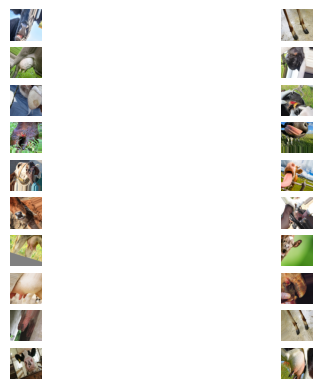

In [ ]:
import matplotlib.pyplot as plt

# Menghasilkan beberapa gambar dari train generator setelah augmentasi
num_samples = 10
for i in range(num_samples):
    batch = next(train_generator)
    for j in range(len(batch)):
        image_array = batch[0][j]  # Batch contains a tuple (images, labels)
        plt.subplot(num_samples, len(batch), i * len(batch) + j + 1)
        plt.imshow(image_array)
        plt.axis('off')

plt.show()

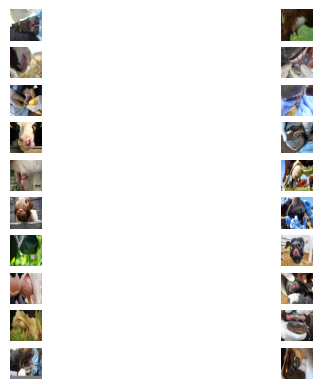

In [47]:
import matplotlib.pyplot as plt
import numpy as np
# Menghasilkan beberapa gambar dari validation generator setelah augmentasi
num_samples = 10
for i in range(num_samples):
    batch = next(validation_generator)
    for j in range(len(batch)):
        image_array = batch[0][j]  # Batch contains a tuple (images, labels)
        plt.subplot(num_samples, len(batch), i * len(batch) + j + 1)
        plt.imshow(image_array)
        plt.axis('off')

save data yang telah diaugmentasi ke dalam suatu folde di drive

In [56]:
import os
import shutil
from google.colab import drive

# Path ke direktori hasil augmentasi di Google Drive
train_augmented_dir = '/content/drive/My Drive/Bangkit_File/ML/Dataset/Versi3/FMD_Cattle_Augmented_TRAIN'

# Jika direktori training belum ada, buat direktori tersebut
if not os.path.exists(train_augmented_dir):
    os.makedirs(train_augmented_dir)

max_images_to_save = 2000  # Menentukan jumlah maksimal gambar yang ingin disimpan

# Simpan hasil gambar augmentasi dari data training ke direktori di Google Drive
total_saved_images = 0
for idx, (images, labels) in enumerate(train_generator):
    for i in range(len(images)):
        if total_saved_images >= max_images_to_save:
            break

        if labels[i] == 0:
            class_dir = '0'
        else:
            class_dir = '1'

        image_path = os.path.join(train_augmented_dir, class_dir, f'augmented_image_train_{idx * len(images) + i}.jpg')
        os.makedirs(os.path.dirname(image_path), exist_ok=True)
        plt.imsave(image_path, images[i])

        total_saved_images += 1

    if total_saved_images >= max_images_to_save:
        break

# Konfirmasi bahwa proses selesai
print("Penyimpanan gambar ke dalam Google Drive selesai.")


Penyimpanan gambar ke dalam Google Drive selesai.


In [57]:
import os
import shutil
from google.colab import drive

# Path ke direktori hasil augmentasi di Google Drive
validation_augmented_dir = '/content/drive/My Drive/Bangkit_File/ML/Dataset/Versi3/FMD_Cattle_Augmented_VALIDATION'

# Jika direktori validation belum ada, buat direktori tersebut
if not os.path.exists(validation_augmented_dir):
    os.makedirs(validation_augmented_dir)

max_images_to_save = 2000  # Menentukan jumlah maksimal gambar yang ingin disimpan

# Simpan hasil gambar augmentasi dari data validasi ke direktori di Google Drive
total_saved_images = 0
for idx, (images, labels) in enumerate(validation_generator):
    for i in range(len(images)):
        if total_saved_images >= max_images_to_save:
            break

        if labels[i] == 0:
            class_dir = '0'
        else:
            class_dir = '1'

        image_path = os.path.join(validation_augmented_dir, class_dir, f'augmented_image_validation_{idx * len(images) + i}.jpg')
        os.makedirs(os.path.dirname(image_path), exist_ok=True)
        plt.imsave(image_path, images[i])

        total_saved_images += 1

    if total_saved_images >= max_images_to_save:
        break

# Konfirmasi bahwa proses selesai
print("Penyimpanan gambar ke dalam Google Drive selesai.")

Penyimpanan gambar ke dalam Google Drive selesai.


download hasil augmentasi tersebut!

In [60]:
import shutil
from google.colab import files

# Fungsi untuk membuat file zip dari sebuah direktori
def create_zip(directory):
    shutil.make_archive(directory, 'zip', directory)

# Membuat file zip untuk direktori training dan validation
create_zip(train_augmented_dir)

# Mendownload file zip untuk direktori training dan validation
files.download(train_augmented_dir + '.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import shutil
from google.colab import files

# Fungsi untuk membuat file zip dari sebuah direktori
def create_zip(directory):
    shutil.make_archive(directory, 'zip', directory)

# Membuat file zip untuk direktori training dan validation
create_zip(validation_augmented_dir)

# Mendownload file zip untuk direktori training dan validation
files.download(validation_augmented_dir + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>